In [1]:
#Import the libraries
import warnings
import itertools
import pandas_datareader as web
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
d = pd.read_csv('Incident.csv')
d

,Unnamed: 0,�..DEAD_YEAR,Age,sex2,Date,DateRec,TimeRec,Vehicle,men,female,nosex
0,1,2011,21.0,1:men,20110101,1/1/2011,0:25:00,ไม่ทราบพาหนะ,1,0,0
1,2,2011,23.0,1:men,20110101,1/1/2011,6:35:00,รถจักรยานยนต์,1,0,0
2,3,2011,26.0,1:men,20110101,1/1/2011,19:00:00,รถจักรยานยนต์,1,0,0
3,4,2011,16.0,1:men,20110101,1/1/2011,2:00:00,รถยนต์,1,0,0
4,5,2011,12.0,1:men,20110101,1/1/2011,2:00:00,รถยนต์,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201374,201375,2020,61.0,2:female,20200801,NaN,NaN,ไม่ทราบพาหนะ,0,1,0
201375,201376,2020,47.0,2:female,20200804,NaN,NaN,รถยนต์,0,1,0
201376,201377,2020,69.0,2:female,20200912,NaN,NaN,รถจักรยานยนต์,0,1,0
201377,201378,2020,51.0,2:female,20200812,NaN,NaN,รถจักรยานยนต์,0,1,0


In [6]:
d['Date'] = pd.to_datetime(d['Date'],format = ('%Y%m%d'))
d = d.set_index(['Date'])

In [7]:
d

,Unnamed: 0,�..DEAD_YEAR,Age,sex2,DateRec,TimeRec,Vehicle,men,female,nosex
Date,,,,,,,,,,
2011-01-01,1,2011,21.0,1:men,1/1/2011,0:25:00,ไม่ทราบพาหนะ,1,0,0
2011-01-01,2,2011,23.0,1:men,1/1/2011,6:35:00,รถจักรยานยนต์,1,0,0
2011-01-01,3,2011,26.0,1:men,1/1/2011,19:00:00,รถจักรยานยนต์,1,0,0
2011-01-01,4,2011,16.0,1:men,1/1/2011,2:00:00,รถยนต์,1,0,0
2011-01-01,5,2011,12.0,1:men,1/1/2011,2:00:00,รถยนต์,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,201375,2020,61.0,2:female,NaN,NaN,ไม่ทราบพาหนะ,0,1,0
2020-08-04,201376,2020,47.0,2:female,NaN,NaN,รถยนต์,0,1,0
2020-09-12,201377,2020,69.0,2:female,NaN,NaN,รถจักรยานยนต์,0,1,0


In [9]:
d['People'] = d['female'] + d['men'] + d['nosex']

In [11]:
y = d['People'].resample('MS').sum()
y

Date
2011-01-01    2068
2011-02-01    1859
2011-03-01    1987
2011-04-01    1907
2011-05-01    1763
              ... 
2020-05-01    1290
2020-06-01    1278
2020-07-01    1423
2020-08-01    1438
2020-09-01    1358
Freq: MS, Name: People, Length: 117, dtype: int64

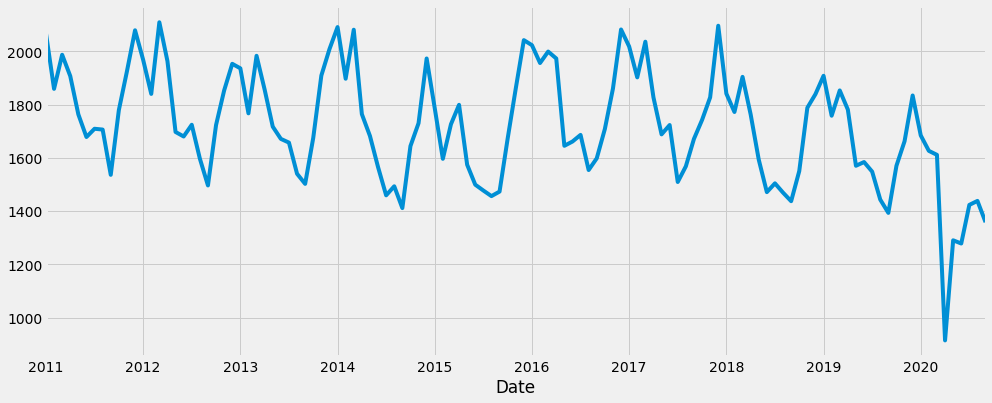

In [12]:
y.plot(figsize=(15, 6))
plt.show()

In [13]:
#Creating the training data set
p=d=q= range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2061.1015814380203
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1725.3559127383414
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1346.4539092390216
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1191.444852666708
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1351.7818983847708
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1321.0341591587753
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1204.121469628971
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1191.9843529161014
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1894.3761531158627
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1586.1488368563073
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1311.283714618155
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1152.8677196436074
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1330.7686184786248
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1316.2263800377655
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1179.7102383793667
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1153.4395410916368
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1491.8044615370666
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1323.176759865

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),
                               seasonal_order =(1,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2086      0.145      1.434      0.152      -0.076       0.494
ma.L1         -0.7355      0.109     -6.760      0.000      -0.949      -0.522
ar.S.L12      -0.4187      0.231     -1.812      0.070      -0.872       0.034
ma.S.L12      -0.5093      0.266     -1.916      0.055      -1.030       0.012
sigma2      1.215e+04    991.295     12.261      0.000    1.02e+04    1.41e+04


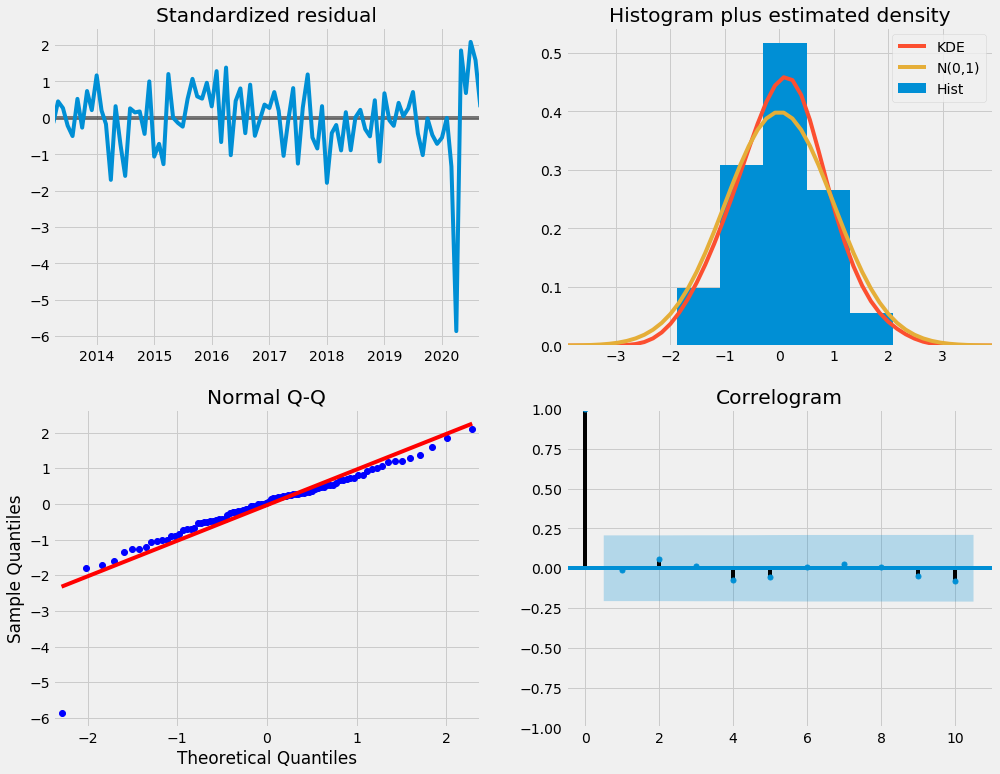

In [16]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'),dynamic=False)
pred_ci = pred.conf_int()

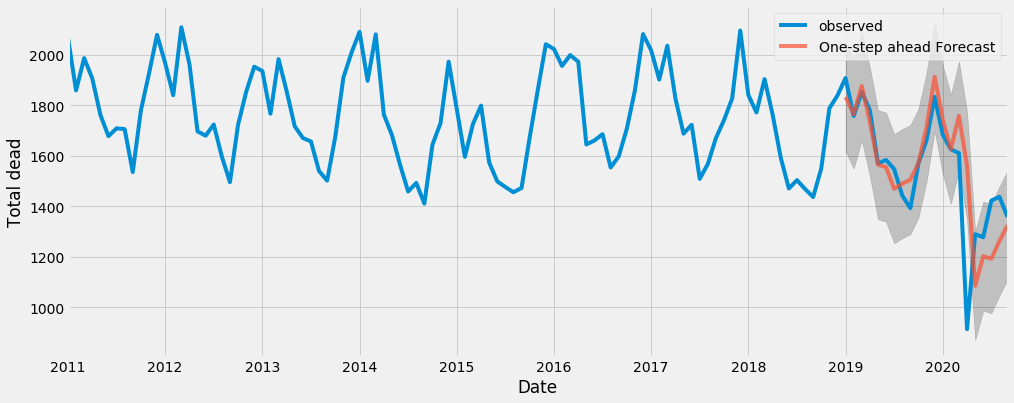

In [22]:
plt.figure(figsize=(15, 6))
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead Forecast',alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total dead')

plt.legend()
plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]

mse = ((y_forecasted - y_truth) **2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 29231.6


In [24]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'),dynamic=True, full_result=True)
pred_dynamic_ci = pred_dynamic.conf_int()


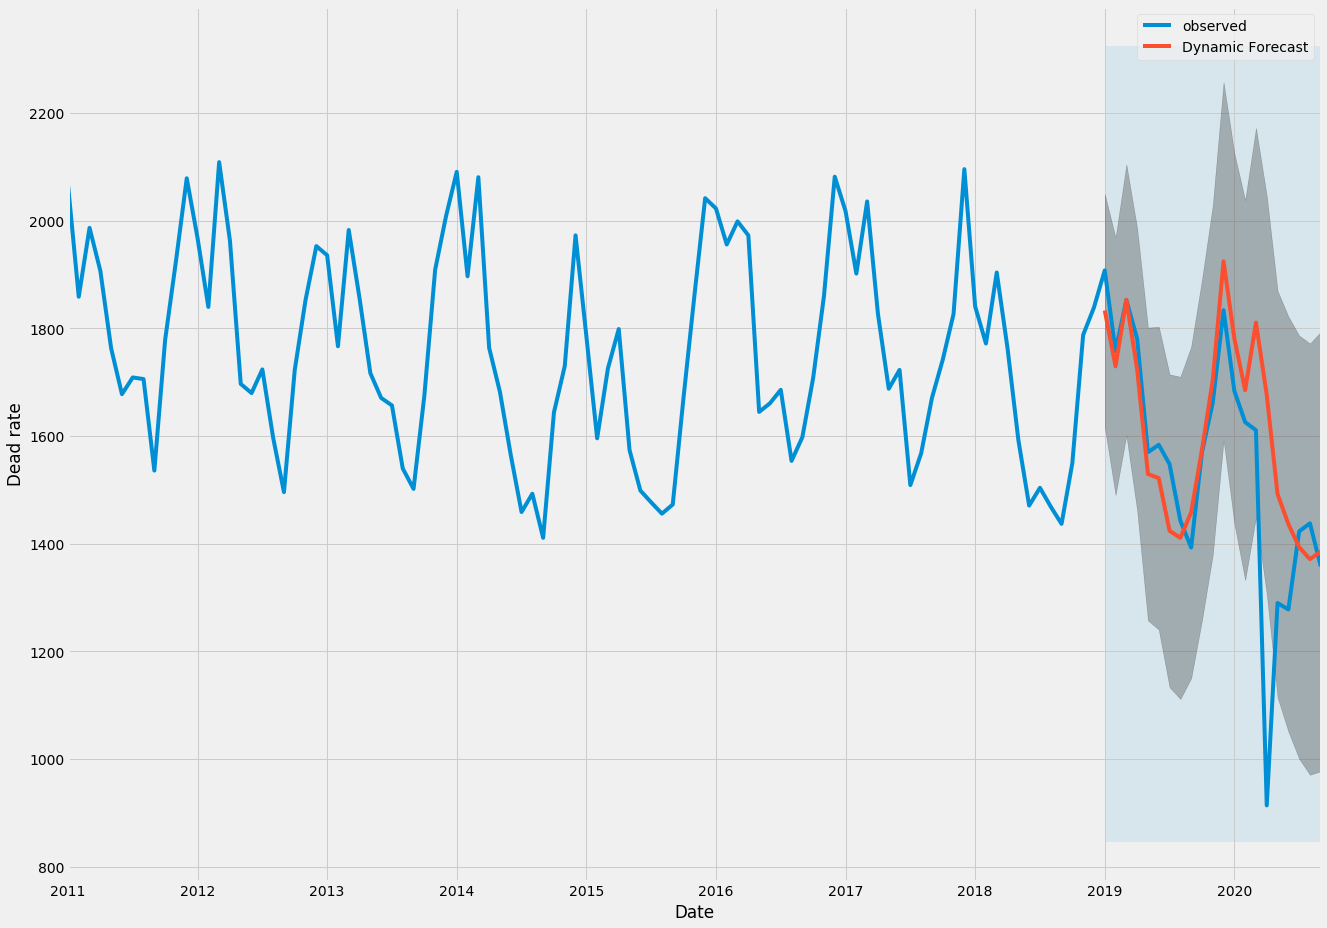

In [25]:
plt.figure(figsize=(15,6))
ax = y['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Dead rate')
plt.legend()
plt.show()

In [26]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 35834.67


In [27]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


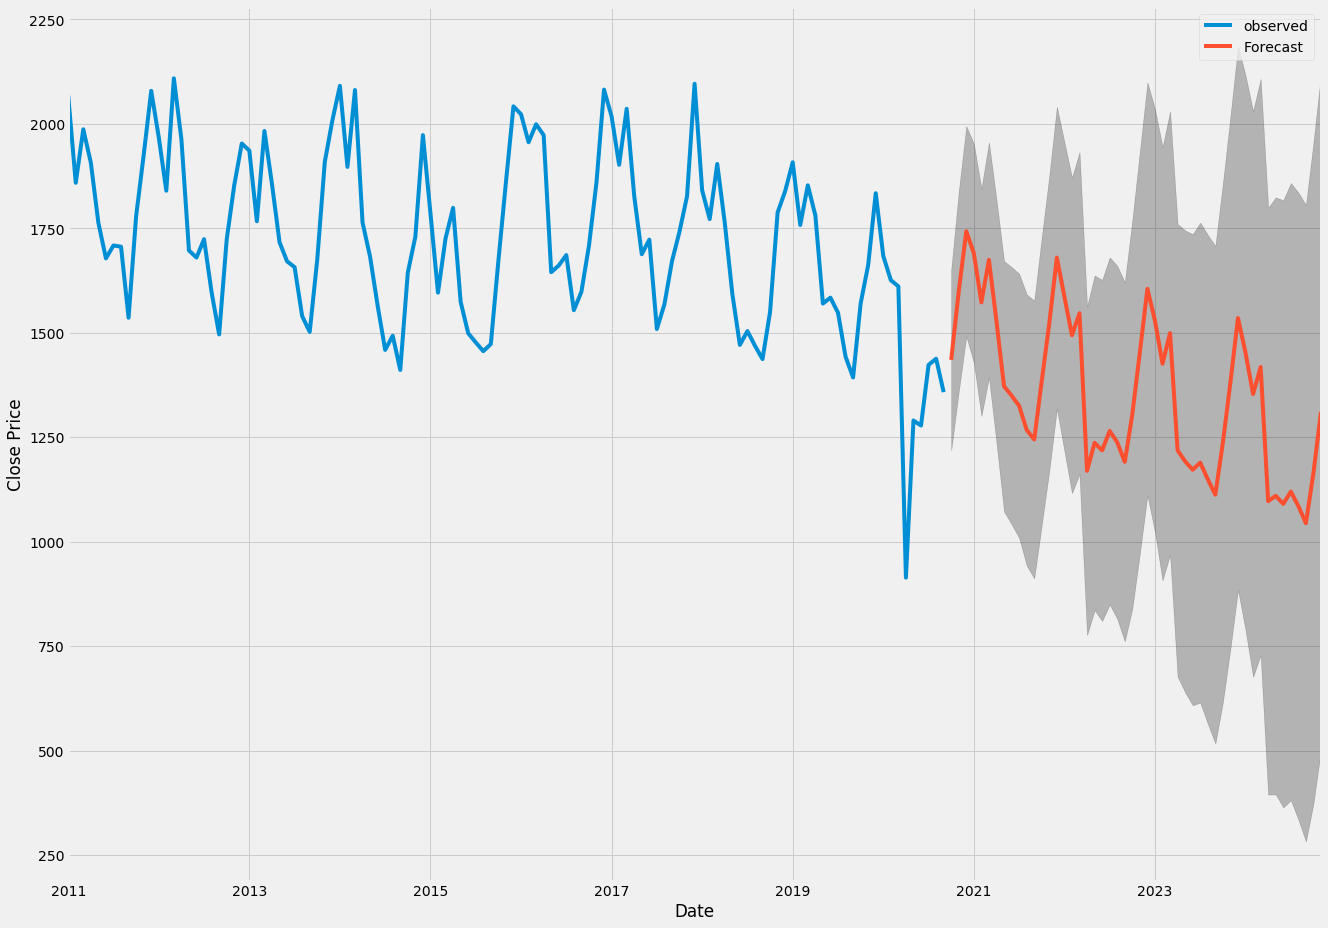

In [28]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.legend()
plt.show()
